<a href="https://colab.research.google.com/github/ekaterga/stc510/blob/main/Module3Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this assignment I started to analyze the data in different ways in order to get a feel on what I wanted to research further. I ended up focuising on different metrics surrounding crimes in single family homes since that was the most popular premise type. Now reviewing the assingment I see that I missed that it was the major portion of it so I apologize for all the extra code. I have notated where I started focusing on single family homes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
crime_data = pd.read_csv('crimestat.csv', delimiter=',', encoding='utf-8', error_bad_lines=False)

<ipython-input-2-cb1fa33a7554>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  crime_data = pd.read_csv('crimestat.csv', delimiter=',', encoding='utf-8', error_bad_lines=False)
<ipython-input-2-cb1fa33a7554>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv('crimestat.csv', delimiter=',', encoding='utf-8', error_bad_lines=False)


In [3]:
crime_data = pd.read_csv('crimestat.csv', delimiter=',', encoding='utf-8', low_memory=False)

At first I was curious to see how many of each crime category listed so I pulled those numbers. I also looked at the amount of crimes committed in each premise type and each zip code.

In [4]:
category_counts = crime_data['UCR CRIME CATEGORY'].value_counts()

In [5]:
category_counts

LARCENY-THEFT                            66216
BURGLARY                                 23646
MOTOR VEHICLE THEFT                      14391
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9306
ROBBERY                                   5640
RAPE                                      1981
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR CRIME CATEGORY, dtype: int64

I also thought it would be usefull to look at these results in a pie chart for better visualization on the comparison of frequencies for each crime

array([<Axes: ylabel='UCR CRIME CATEGORY'>], dtype=object)

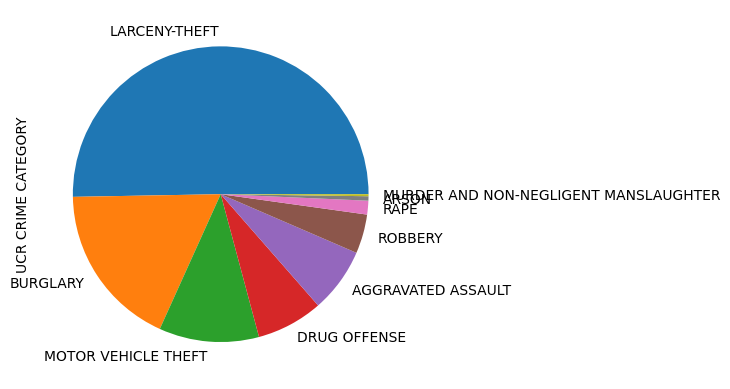

In [6]:
category_counts.plot(kind='pie',subplots=True)

In [7]:
premise_counts = crime_data['PREMISE TYPE'].value_counts()

In [8]:
premise_counts

SINGLE FAMILY HOUSE                    25328
APARTMENT                              14957
PARKING LOT                            14148
STREET / ROADWAY / ALLEY / SIDEWALK    11596
RETAIL BUSINESS                        10852
                                       ...  
FARM FACILITY                              3
GAMBLING FACILITY/CASINO/RACE TRACK        2
LAKE / WATERWAY / BEACH                    1
TRIBAL LANDS                               1
REST AREA                                  1
Name: PREMISE TYPE, Length: 93, dtype: int64

In [9]:
zipcode_counts = crime_data['ZIP'].value_counts()

In [10]:
zipcode_counts

85015.0    6963
85008.0    6320
85009.0    5513
85041.0    5477
85051.0    5389
           ... 
85203.0       1
85266.0       1
85381.0       1
85268.0       1
85212.0       1
Name: ZIP, Length: 98, dtype: int64

First I wanted to do some of the recommended grouping so I could get a feel of what data I wanted to group together.

First I did zipcode and crime category. I also converted the results to a table for them to be easy read.

In [11]:
zip_cat_stats = crime_data.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='Count')


In [12]:
zip_cat_stats

,ZIP,UCR CRIME CATEGORY,Count
0,85003.0,AGGRAVATED ASSAULT,120
1,85003.0,ARSON,7
2,85003.0,BURGLARY,179
3,85003.0,DRUG OFFENSE,194
4,85003.0,LARCENY-THEFT,758
...,...,...,...
556,85395.0,AGGRAVATED ASSAULT,1
557,85395.0,RAPE,1
558,85396.0,BURGLARY,1
559,85396.0,LARCENY-THEFT,2


I thought it would be interesting to look at a speciic zipocde beecause this was too much data to put all into one table. I thought that a bar plot made the most sense for the data

In [13]:
specificzipstats = zip_cat_stats[zip_cat_stats['ZIP'] == 85015]

In [14]:
print(specificzipstats)

        ZIP                     UCR CRIME CATEGORY  Count
81  85015.0                     AGGRAVATED ASSAULT    476
82  85015.0                                  ARSON     41
83  85015.0                               BURGLARY   1140
84  85015.0                           DRUG OFFENSE    584
85  85015.0                          LARCENY-THEFT   3636
86  85015.0                    MOTOR VEHICLE THEFT    580
87  85015.0  MURDER AND NON-NEGLIGENT MANSLAUGHTER     19
88  85015.0                                   RAPE     80
89  85015.0                                ROBBERY    407


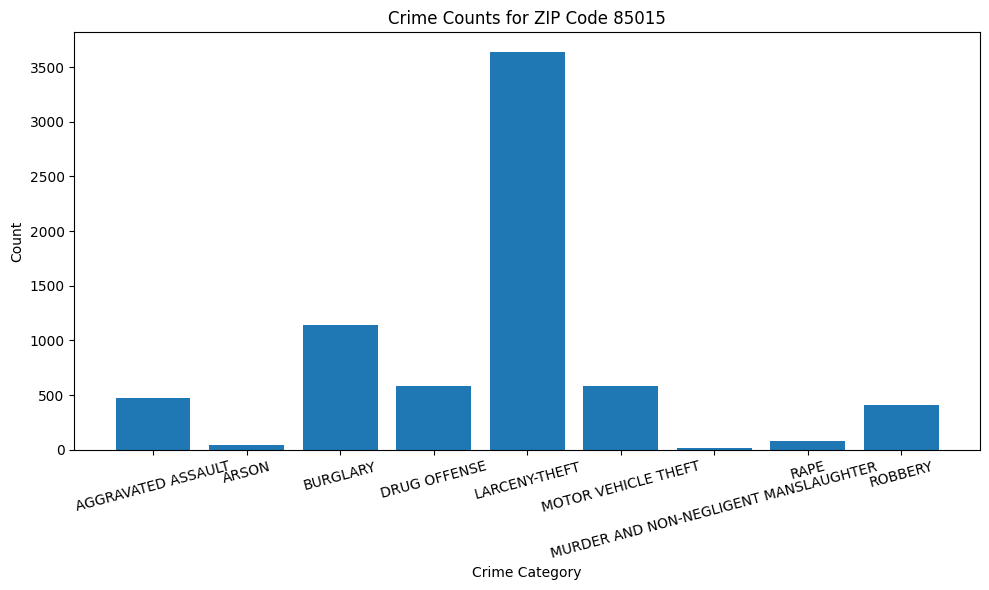

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(specificzipstats['UCR CRIME CATEGORY'], specificzipstats['Count'])
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.title('Crime Counts for ZIP Code 85015')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [16]:
prem_cat_stats = crime_data.groupby(['PREMISE TYPE', 'UCR CRIME CATEGORY']).size().reset_index(name='Count')


In [17]:
prem_cat_stats

,PREMISE TYPE,UCR CRIME CATEGORY,Count
0,ABANDONED/CONDEMNED STRUCTURE,AGGRAVATED ASSAULT,3
1,ABANDONED/CONDEMNED STRUCTURE,BURGLARY,2
2,ABANDONED/CONDEMNED STRUCTURE,DRUG OFFENSE,2
3,ABANDONED/CONDEMNED STRUCTURE,RAPE,2
4,ADULT ONLY STORE / MOVIE,AGGRAVATED ASSAULT,4
...,...,...,...
529,WAREHOUSE / FACTORY,BURGLARY,124
530,WAREHOUSE / FACTORY,DRUG OFFENSE,12
531,WAREHOUSE / FACTORY,LARCENY-THEFT,177
532,WAREHOUSE / FACTORY,MOTOR VEHICLE THEFT,16


Next I wanted to look at the crimes in the context of violent and nonviolent crimes as suggested in canvas so I pulled the data into those categories by finding the total sum of each defined crime type in the csv.
Though there is probably an easier way to do this I decided I was going to but the categories in violent and non violent crimes in a list.

In [18]:
violent_crimes = ['AGGRAVATED ASSAULT', 'ROBBERY', 'RAPE', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER']
nonviolent_crimes = ['BURGLARY', 'MOTOR VEHICLE THEFT','DRUG OFFENSE','ARSON']

Then after some research I found a recommendation to frame the code as I did below.

In [19]:
violent_crime_data = crime_data[crime_data['UCR CRIME CATEGORY'].isin(violent_crimes)]
nonviolent_crime_data = crime_data[crime_data['UCR CRIME CATEGORY'].isin(nonviolent_crimes)]

In [20]:
violent_counts = violent_crime_data['UCR CRIME CATEGORY'].value_counts()
nonviolent_counts = nonviolent_crime_data['UCR CRIME CATEGORY'].value_counts()


In [21]:
print("Violent Crime Counts:")
print(violent_counts)
print("\nNonviolent Crime Counts:")
print(nonviolent_counts)

Violent Crime Counts:
AGGRAVATED ASSAULT                       9306
ROBBERY                                  5640
RAPE                                     1981
MURDER AND NON-NEGLIGENT MANSLAUGHTER     289
Name: UCR CRIME CATEGORY, dtype: int64

Nonviolent Crime Counts:
BURGLARY               23646
MOTOR VEHICLE THEFT    14391
DRUG OFFENSE            9572
ARSON                    634
Name: UCR CRIME CATEGORY, dtype: int64


In [22]:
total_violent = violent_counts.sum()
total_nonviolent = nonviolent_counts.sum()

In [23]:
print("\nTotal Violent Crimes:", total_violent)
print("Total Nonviolent Crimes:", total_nonviolent)


Total Violent Crimes: 17216
Total Nonviolent Crimes: 48243


Next I created lists of crimes I considered violent and nonviolent in order to analyze what type of crime each zipcode and premise type have more of

In [24]:
violent_counts_by_zip = violent_crime_data.groupby('ZIP')['UCR CRIME CATEGORY'].value_counts().unstack().fillna(0)
nonviolent_counts_by_zip = nonviolent_crime_data.groupby('ZIP')['UCR CRIME CATEGORY'].value_counts().unstack().fillna(0)

In [25]:
total_violent_by_zip=violent_counts_by_zip.sum(axis=1)
total_nonviolent_by_zip=nonviolent_counts_by_zip.sum(axis=1)

In [26]:
result = pd.DataFrame({
    'Total Violent Crimes': total_violent_by_zip,
    'Total Nonviolent Crimes': total_nonviolent_by_zip,
    'Dominant Crime Type': 'Violent'
})

In [27]:
result['Dominant Crime Type'] = 'Violent'
result.loc[result['Total Nonviolent Crimes'] > result['Total Violent Crimes'], 'Dominant Crime Type'] = 'Nonviolent'

In [28]:
print(result)

         Total Violent Crimes  Total Nonviolent Crimes Dominant Crime Type
ZIP                                                                       
85003.0                 247.0                    508.0          Nonviolent
85004.0                 257.0                    386.0          Nonviolent
85006.0                 502.0                    957.0          Nonviolent
85007.0                 443.0                    799.0          Nonviolent
85008.0                 902.0                   2222.0          Nonviolent
...                       ...                      ...                 ...
85382.0                   NaN                      1.0             Violent
85383.0                   1.0                      1.0             Violent
85392.0                   2.0                      6.0          Nonviolent
85395.0                   2.0                      NaN             Violent
85396.0                   NaN                      2.0             Violent

[93 rows x 3 columns]


In [29]:
violent_counts_by_prem = violent_crime_data.groupby('PREMISE TYPE')['UCR CRIME CATEGORY'].value_counts().unstack().fillna(0)
nonviolent_counts_by_prem = nonviolent_crime_data.groupby('PREMISE TYPE')['UCR CRIME CATEGORY'].value_counts().unstack().fillna(0)

In [30]:
total_violent_by_prem = violent_counts_by_prem.sum(axis=1)
total_nonviolent_by_prem = nonviolent_counts_by_prem.sum(axis=1)

In [31]:
result_prem = pd.DataFrame({
    'Total Violent Crimes': total_violent_by_prem,
    'Total Nonviolent Crimes': total_nonviolent_by_prem,
    'Dominant Crime Type': 'Violent'
})

In [32]:
result_prem['Dominant Crime Type'] = result_prem[['Total Violent Crimes', 'Total Nonviolent Crimes']].idxmax(axis=1)
result_prem['Dominant Crime Type'] = result_prem['Dominant Crime Type'].apply(lambda x: 'Nonviolent' if 'Nonviolent' in x else 'Violent')

In [33]:
print(result_prem)

                               Total Violent Crimes  Total Nonviolent Crimes  \
PREMISE TYPE                                                                   
ABANDONED/CONDEMNED STRUCTURE                   5.0                      4.0   
ADULT ONLY STORE / MOVIE                       14.0                     15.0   
AIRPORT                                        21.0                    124.0   
AMUSEMENT PARK                                  NaN                      4.0   
APARTMENT                                    3075.0                   6365.0   
...                                             ...                      ...   
THEATRE                                         4.0                      9.0   
TRAIN STATION                                   3.0                      4.0   
UNKNOWN                                       206.0                    104.0   
VEHICLE                                       630.0                   1900.0   
WAREHOUSE / FACTORY                     

After looking at all the conts and getting a feel for them I started focusing on single family homes. First I looked at the amounts of each crime type.

In [34]:
specific_prem_stats = prem_cat_stats[prem_cat_stats["PREMISE TYPE"] == "SINGLE FAMILY HOUSE"]

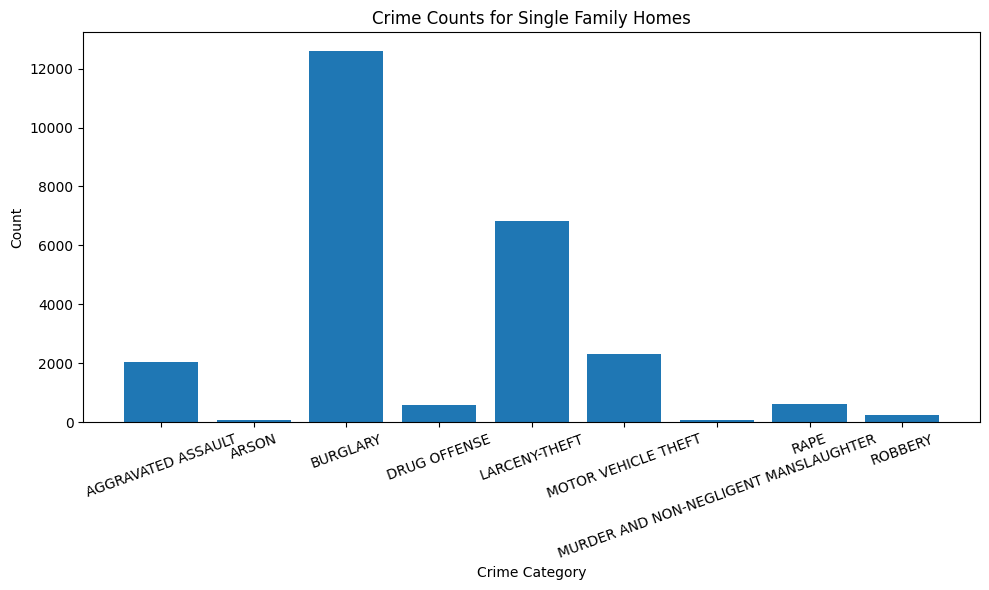

In [35]:
plt.figure(figsize=(10, 6))
plt.bar(specific_prem_stats['UCR CRIME CATEGORY'], specific_prem_stats['Count'])
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.title('Crime Counts for Single Family Homes')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

Then I grouped the crimes as violent and nonviolent. The graph shows that nonviolent crimes are more popular in this dataset by an overwhelming majority.This would be good to  know for residents of this home type so they can account for security measures.

In [36]:
crime_category_groups = {
    'Violent Crimes': ['AGGRAVATED ASSAULT', 'MURDER AND NON-NEGLIGENT MANSLAUGHTER', 'RAPE', 'ROBBERY'],
    'Nonviolent Crimes': ['ARSON', 'BURGLARY', 'LARCENY-THEFT', 'MOTOR VEHICLE THEFT'],
}

In [37]:
grouped_prem_stats = pd.DataFrame(columns=['Crime Category', 'Count'])

In [38]:
for group, categories in crime_category_groups.items():
    group_count = specific_prem_stats[specific_prem_stats['UCR CRIME CATEGORY'].isin(categories)]['Count'].sum()
    grouped_prem_stats = grouped_prem_stats.append({'Crime Category': group, 'Count': group_count}, ignore_index=True)

<ipython-input-38-0cb86b786de4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_prem_stats = grouped_prem_stats.append({'Crime Category': group, 'Count': group_count}, ignore_index=True)
<ipython-input-38-0cb86b786de4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grouped_prem_stats = grouped_prem_stats.append({'Crime Category': group, 'Count': group_count}, ignore_index=True)


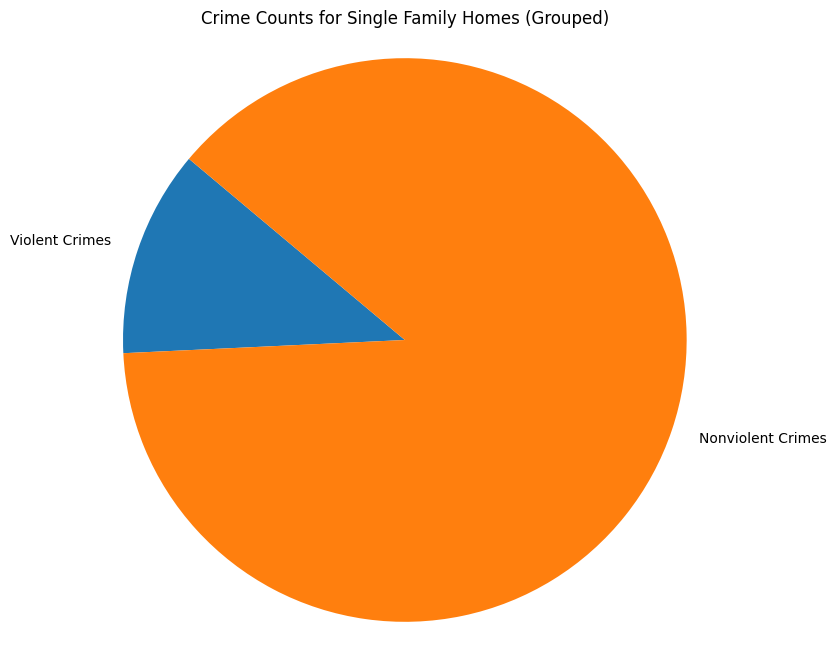

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_prem_stats['Count'], labels=grouped_prem_stats['Crime Category'], startangle=140)
plt.title('Crime Counts for Single Family Homes (Grouped)')
plt.axis('equal')
plt.show()

Lastly, I wanted to look at the time of day most crimes were committed. I started by seperating out the time info from the OCCURED ON CATEGORY

In [40]:
from datetime import datetime

In [41]:
df_single_home = crime_data[crime_data['PREMISE TYPE'] == 'SINGLE FAMILY HOUSE'].copy()

I kept running into an error in the below code so after research I added .copy() which fixed it

In [46]:
df_single_home['OCCURRED ON'] = pd.to_datetime(df_single_home['OCCURRED ON'], errors='coerce')

In [54]:
def categorize_time_of_day(time):
  hour = time.hour
  if 0 <= hour < 6:
    return 'Early Morning'
  elif 6 <= hour < 11:
    return 'Morning'
  elif 11 <= hour < 13:
    return 'Midday'
  elif 13 <= hour < 16:
    return 'Afternoon'
  elif 16 <= hour < 19:
    return 'Evening'
  else:
    return 'Night'

In [55]:
df_single_home['Time of Day'] = df_single_home['OCCURRED ON'].apply(categorize_time_of_day)

In [57]:
crime_count_per_time_of_day = df_single_home['Time of Day'].value_counts()

In [58]:
print(crime_count_per_time_of_day)

Morning          6380
Night            5190
Early Morning    4357
Evening          3441
Afternoon        3077
Midday           2883
Name: Time of Day, dtype: int64


In [60]:
time_of_day_order = ['Early Morning','Morning', 'Midday', 'Afternoon', 'Evening', 'Night']


In [73]:
crime_count_ordered = crime_count_per_time_of_day.loc[time_of_day_order]

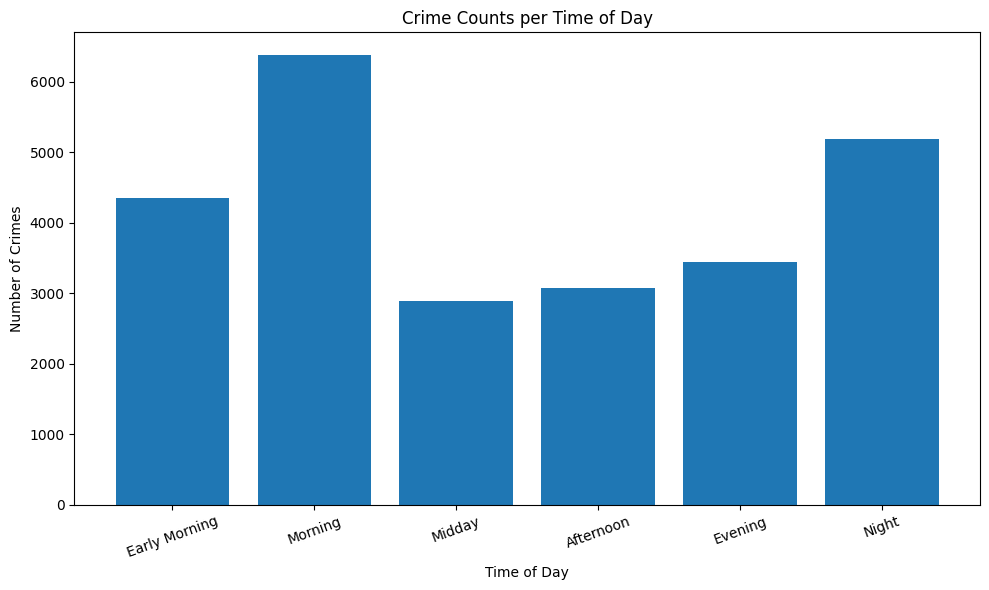

In [74]:
plt.figure(figsize=(10, 6))
plt.bar(crime_count_ordered.index, crime_count_ordered.values)
plt.xlabel('Time of Day')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts per Time of Day')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

This was really interesting to me because I expected most of the crimes to occur at night not during the day